# API Request - Bureau of Labor Statistics 

In this notebook we'll see how to use the API of the Bureau of Labor Statistics [BLS](https://www.bls.gov) 


The BLS Public API utilizes two HTTP request-response mechanisms to retrieve data: **GET** and **POST**. 
- GET requests data from a specified source. 
- POST submits data to a specified resource to be processed. 

The BLS Public Data API uses GET to request a single piece of information and POST for all other requests

We need to know what we want to get from the BLS. In this notebook, we'll get 3 series, based on the following codes 

| Description      | Code |
| ----------- | ----------- |
| Unemployment Rate | LNU04000000 |
| Unemployment Rate, Illinois | LAUST170000000000003        |
| Unemployment Rate: Champaign-Urbana, IL MSU (U) | LAUMT171658000000003        |

I got the codes from webapage: https://beta.bls.gov/dataQuery/find?st=0&r=100&more=0 


In [1]:
#setup
import pandas as pd
import requests
import json
#from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy as np
%matplotlib inline

In this example, we will use `requests.post`, which syntax is:

`requests.post(url, data={key: value}, json={key: value}, args)`

In [2]:
#A dictionary of HTTP headers to send to the specified url.
headers = {'Content-type': 'application/json'} 

# A dictionary, list of tuples, bytes or a file object to send to the specified url
# json.dumps converts input dictionary into  string and stores it in json_string

data = json.dumps({"seriesid": ['LNU04000000','LAUST170000000000003','LAUMT171658000000003'],
                   "startyear":"2005", "endyear":"2020", "registrationkey":"3aa8646daabb45b69cde87313b57c622"}) 


In [3]:
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)


In [4]:
p.status_code

200

In [5]:
p.text

'{"status":"REQUEST_SUCCEEDED","responseTime":447,"message":[],"Results":{\n"series":\n[{"seriesID":"LNU04000000","data":[{"year":"2020","period":"M12","periodName":"December","value":"6.5","footnotes":[{}]},{"year":"2020","period":"M11","periodName":"November","value":"6.4","footnotes":[{}]},{"year":"2020","period":"M10","periodName":"October","value":"6.6","footnotes":[{}]},{"year":"2020","period":"M09","periodName":"September","value":"7.7","footnotes":[{}]},{"year":"2020","period":"M08","periodName":"August","value":"8.5","footnotes":[{}]},{"year":"2020","period":"M07","periodName":"July","value":"10.5","footnotes":[{}]},{"year":"2020","period":"M06","periodName":"June","value":"11.2","footnotes":[{}]},{"year":"2020","period":"M05","periodName":"May","value":"13.0","footnotes":[{}]},{"year":"2020","period":"M04","periodName":"April","value":"14.4","footnotes":[{}]},{"year":"2020","period":"M03","periodName":"March","value":"4.5","footnotes":[{}]},{"year":"2020","period":"M02","peri

In [6]:
json_data = json.loads(p.text)
json_data

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 447,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNU04000000',
    'data': [{'year': '2020',
      'period': 'M12',
      'periodName': 'December',
      'value': '6.5',
      'footnotes': [{}]},
     {'year': '2020',
      'period': 'M11',
      'periodName': 'November',
      'value': '6.4',
      'footnotes': [{}]},
     {'year': '2020',
      'period': 'M10',
      'periodName': 'October',
      'value': '6.6',
      'footnotes': [{}]},
     {'year': '2020',
      'period': 'M09',
      'periodName': 'September',
      'value': '7.7',
      'footnotes': [{}]},
     {'year': '2020',
      'period': 'M08',
      'periodName': 'August',
      'value': '8.5',
      'footnotes': [{}]},
     {'year': '2020',
      'period': 'M07',
      'periodName': 'July',
      'value': '10.5',
      'footnotes': [{}]},
     {'year': '2020',
      'period': 'M06',
      'periodName': 'June',
      'value': '11.2',
      'footnotes': [{}]},
   

In [7]:
type(json_data)

dict

In [8]:
json_data.keys()

dict_keys(['status', 'responseTime', 'message', 'Results'])

In [9]:
json_data['Results']


{'series': [{'seriesID': 'LNU04000000',
   'data': [{'year': '2020',
     'period': 'M12',
     'periodName': 'December',
     'value': '6.5',
     'footnotes': [{}]},
    {'year': '2020',
     'period': 'M11',
     'periodName': 'November',
     'value': '6.4',
     'footnotes': [{}]},
    {'year': '2020',
     'period': 'M10',
     'periodName': 'October',
     'value': '6.6',
     'footnotes': [{}]},
    {'year': '2020',
     'period': 'M09',
     'periodName': 'September',
     'value': '7.7',
     'footnotes': [{}]},
    {'year': '2020',
     'period': 'M08',
     'periodName': 'August',
     'value': '8.5',
     'footnotes': [{}]},
    {'year': '2020',
     'period': 'M07',
     'periodName': 'July',
     'value': '10.5',
     'footnotes': [{}]},
    {'year': '2020',
     'period': 'M06',
     'periodName': 'June',
     'value': '11.2',
     'footnotes': [{}]},
    {'year': '2020',
     'period': 'M05',
     'periodName': 'May',
     'value': '13.0',
     'footnotes': [{}]},
    

In [10]:
json_data['Results']['series']

[{'seriesID': 'LNU04000000',
  'data': [{'year': '2020',
    'period': 'M12',
    'periodName': 'December',
    'value': '6.5',
    'footnotes': [{}]},
   {'year': '2020',
    'period': 'M11',
    'periodName': 'November',
    'value': '6.4',
    'footnotes': [{}]},
   {'year': '2020',
    'period': 'M10',
    'periodName': 'October',
    'value': '6.6',
    'footnotes': [{}]},
   {'year': '2020',
    'period': 'M09',
    'periodName': 'September',
    'value': '7.7',
    'footnotes': [{}]},
   {'year': '2020',
    'period': 'M08',
    'periodName': 'August',
    'value': '8.5',
    'footnotes': [{}]},
   {'year': '2020',
    'period': 'M07',
    'periodName': 'July',
    'value': '10.5',
    'footnotes': [{}]},
   {'year': '2020',
    'period': 'M06',
    'periodName': 'June',
    'value': '11.2',
    'footnotes': [{}]},
   {'year': '2020',
    'period': 'M05',
    'periodName': 'May',
    'value': '13.0',
    'footnotes': [{}]},
   {'year': '2020',
    'period': 'M04',
    'periodNam

In [11]:
json_data['Results']['series'][0]

{'seriesID': 'LNU04000000',
 'data': [{'year': '2020',
   'period': 'M12',
   'periodName': 'December',
   'value': '6.5',
   'footnotes': [{}]},
  {'year': '2020',
   'period': 'M11',
   'periodName': 'November',
   'value': '6.4',
   'footnotes': [{}]},
  {'year': '2020',
   'period': 'M10',
   'periodName': 'October',
   'value': '6.6',
   'footnotes': [{}]},
  {'year': '2020',
   'period': 'M09',
   'periodName': 'September',
   'value': '7.7',
   'footnotes': [{}]},
  {'year': '2020',
   'period': 'M08',
   'periodName': 'August',
   'value': '8.5',
   'footnotes': [{}]},
  {'year': '2020',
   'period': 'M07',
   'periodName': 'July',
   'value': '10.5',
   'footnotes': [{}]},
  {'year': '2020',
   'period': 'M06',
   'periodName': 'June',
   'value': '11.2',
   'footnotes': [{}]},
  {'year': '2020',
   'period': 'M05',
   'periodName': 'May',
   'value': '13.0',
   'footnotes': [{}]},
  {'year': '2020',
   'period': 'M04',
   'periodName': 'April',
   'value': '14.4',
   'footnot

In [12]:
json_data['Results']['series'][0]['data']

[{'year': '2020',
  'period': 'M12',
  'periodName': 'December',
  'value': '6.5',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M11',
  'periodName': 'November',
  'value': '6.4',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M10',
  'periodName': 'October',
  'value': '6.6',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M09',
  'periodName': 'September',
  'value': '7.7',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M08',
  'periodName': 'August',
  'value': '8.5',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M07',
  'periodName': 'July',
  'value': '10.5',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M06',
  'periodName': 'June',
  'value': '11.2',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M05',
  'periodName': 'May',
  'value': '13.0',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M04',
  'periodName': 'April',
  'value': '14.4',
  'footnotes': [{}]},
 {'year': '2020',
  'period': 'M03',
  'periodName': 'March',
  'valu

In [13]:
type(json_data['Results']['series'][0]['data'])

list

### Constructing DataFrame

In [14]:
df = pd.DataFrame()
df['year'] = [x['year'] for x in json_data['Results']['series'][0]['data']]
df['period'] = [x['period'] for x in json_data['Results']['series'][0]['data']]
df['ur_us'] = [x['value'] for x in json_data['Results']['series'][0]['data']]
df['ur_ill'] = [x['value'] for x in json_data['Results']['series'][1]['data']]
df['ur_cu'] = [x['value'] for x in json_data['Results']['series'][2]['data']]

df

,year,period,ur_us,ur_ill,ur_cu
0,2020,M12,6.5,7.5,5.0
1,2020,M11,6.4,6.5,4.6
2,2020,M10,6.6,7.2,4.5
3,2020,M09,7.7,10.0,6.1
4,2020,M08,8.5,11.1,7.5
...,...,...,...,...,...
187,2005,M05,4.9,5.6,3.7
188,2005,M04,4.9,5.7,3.7
189,2005,M03,5.4,6.0,4.1
190,2005,M02,5.8,6.6,4.7


### Clean Data Frame

In [15]:
df['month'] = df['period'].str.replace('M', '', 1) 
df['time'] = df['year'].str.cat(df['month'],sep="-")
df['time'] = pd.to_datetime(df['time'],format = "%Y-%m")


df['ur_us'] = pd.to_numeric(df['ur_us'])
df['ur_ill'] = pd.to_numeric(df['ur_ill'])
df['ur_cu'] = pd.to_numeric(df['ur_cu'])



## Plotting Data


In [16]:
date_form = DateFormatter("%Y-%m");

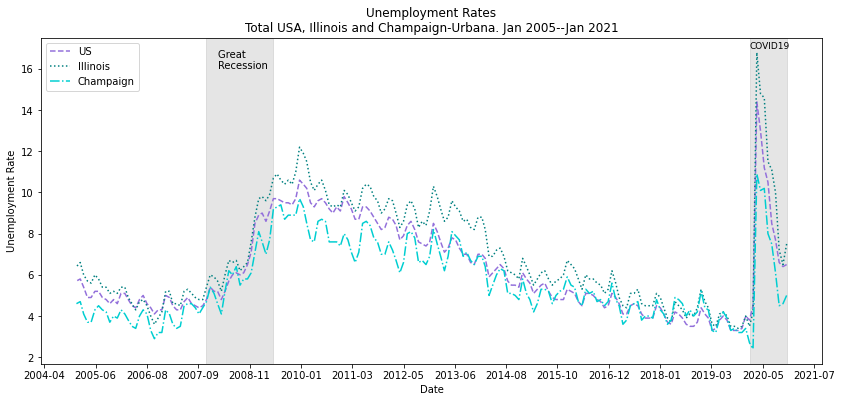

In [17]:
fig, ax = plt.subplots(1, figsize=(14, 6))
ax.plot(df.time, df.ur_us,linestyle="--", label="US", color='mediumpurple', linewidth=1.5);
ax.plot(df.time, df.ur_ill,linestyle=":", label="Illinois", color='teal',linewidth=1.5);
ax.plot(df.time, df.ur_cu, linestyle="-.", label="Champaign", color='darkturquoise',linewidth=1.5);
ax.legend(loc="best", fontsize=10);

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Unemployment Rate",
       title="Unemployment Rates\nTotal USA, Illinois and Champaign-Urbana. Jan 2005--Jan 2021");

ax.xaxis.set_major_formatter(date_form);
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=60));
ax.axvspan(df.time[156], df.time[138], alpha=0.2, color='grey');
ax.axvspan(df.time[10], df.time[0], alpha=0.2, color='grey');
ax.text(df.time[153],16, "Great \nRecession", fontsize=10);
ax.text(df.time[10],17, "COVID19", fontsize=9);